In [207]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

nifty50=pd.read_csv(r'D:\unsupervised\ind_nifty50list.csv')
nifty50['Symbol']
symbols_list= nifty50['Symbol'].unique().tolist()
symbols_list


['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [208]:
from datetime import datetime
date = datetime.now()
end=date.date()
start = (pd.to_datetime(end) - pd.DateOffset(365 * 10)).date()
tickers = symbols_list
df = yf.download(tickers, start, end).stack()

df


[*********************100%%**********************]  50 of 50 completed


Adj Close        Close         High          Low  \
Date                                                                           
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 Open      Volume  
Date                                               
2013-11-11 ADANIENT.NS      33.107410  38569367.0  
           ADANIPORTS.NS   149.300003   2734419.0  
           APOLLOHOSP.NS   892.299988    117935.0  
           ASIANPAINT.NS   551.150024    942969.0  
           AXISBANK.NS     221.000000  16116270.0  
...                               ...         ...  
2023-11-08 TECHM.NS       1151.750000    806162.0  
           TITAN.NS       3289.000000    632305.0  
           ULTRACEMCO.NS  8689.000000    132370.0  
           UPL.NS          555.900024   1190583.0  
           WIPRO.NS        384.600006   3551026.0  

[120693 rows x 6 columns]

In [209]:
df.index.names = ['date', 'ticker']
df.columns= df.columns.str.lower()

In [210]:
#Calculation of Garman-Klass volatility
df['garman_klass_vol'] =  (np.log(df['high'])-np.log(df['low']))**2/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open'])))


In [211]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol  
date       ticker                                                    
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180  
           ADANIPORTS.NS   149.300003   2734419.0          0.018941  
           APOLLOHOSP.NS   892.299988    117935.0          0.012373  
           ASIANPAINT.NS   551.150024    942969.0          0.031711  
           AXISBANK.NS     221.000000  16116270.0          0.026328  
...                               ...         ...               ...  
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345  
           TITAN.NS       3289.000000    632305.0         -0.002552  
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409  
           UPL.NS          555.900024   1190583.0          0.000175  
           WIPRO.NS        384.600006   3551026.0          0.002482  

[120693 rows x 7 columns]

In [212]:

#Caculation of RSI
df['rsi']= df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))


In [213]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol        rsi  
date       ticker                                                               
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180        NaN  
           ADANIPORTS.NS   149.300003   2734419.0          0.018941        NaN  
           APOLLOHOSP.NS   892.299988    117935.0          0.012373        NaN  
           ASIANPAINT.NS   551.150024    942969.0          0.031711        NaN  
           AXISBANK.NS     221.000000  16116270.0          0.026328        NaN  
...                               ...         ...               ...        ...  
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345  43.117933  
           TITAN.NS       3289.000000    632305.0         -0.002552  59.143309  
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409  61.700383  
           UPL.NS          555.900024   1190583.0          0.000175  38.500553  
           WIPRO.NS        384.600006   3551026.0          0.002482  35.708958  

[120693 rows x 8 columns]

In [214]:
#ATR
def compute_atr(stock_data):
    atr=pandas_ta.atr(high=stock_data['high'],
              low=stock_data['low'],
              close=stock_data['close'],
              length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

In [215]:
df.index.names = ['date', 'ticker']

In [216]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol  \
date       ticker                                                     
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180   
           ADANIPORTS.NS   149.300003   2734419.0          0.018941   
           APOLLOHOSP.NS   892.299988    117935.0          0.012373   
           ASIANPAINT.NS   551.150024    942969.0          0.031711   
           AXISBANK.NS     221.000000  16116270.0          0.026328   
...                               ...         ...               ...   
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345   
           TITAN.NS       3289.000000    632305.0         -0.002552   
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409   
           UPL.NS          555.900024   1190583.0          0.000175   
           WIPRO.NS        384.600006   3551026.0          0.002482   

                                rsi       atr  
date       ticker                              
2013-11-11 ADANIENT.NS          NaN       NaN  
           ADANIPORTS.NS        NaN       NaN  
           APOLLOHOSP.NS        NaN       NaN  
           ASIANPAINT.NS        NaN       NaN  
           AXISBANK.NS          NaN       NaN  
...                             ...       ...  
2023-11-08 TECHM.NS       43.117933  0.053835  
           TITAN.NS       59.143309  1.501380  
           ULTRACEMCO.NS  61.700383  0.507611  
           UPL.NS         38.500553 -0.563356  
           WIPRO.NS       35.708958 -0.255231  

[120693 rows x 9 columns]

In [217]:
def compute_macd(close):
    macd= pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

In [218]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol  \
date       ticker                                                     
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180   
           ADANIPORTS.NS   149.300003   2734419.0          0.018941   
           APOLLOHOSP.NS   892.299988    117935.0          0.012373   
           ASIANPAINT.NS   551.150024    942969.0          0.031711   
           AXISBANK.NS     221.000000  16116270.0          0.026328   
...                               ...         ...               ...   
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345   
           TITAN.NS       3289.000000    632305.0         -0.002552   
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409   
           UPL.NS          555.900024   1190583.0          0.000175   
           WIPRO.NS        384.600006   3551026.0          0.002482   

                                rsi       atr      macd  
date       ticker                                        
2013-11-11 ADANIENT.NS          NaN       NaN       NaN  
           ADANIPORTS.NS        NaN       NaN       NaN  
           APOLLOHOSP.NS        NaN       NaN       NaN  
           ASIANPAINT.NS        NaN       NaN       NaN  
           AXISBANK.NS          NaN       NaN       NaN  
...                             ...       ...       ...  
2023-11-08 TECHM.NS       43.117933  0.053835 -1.311858  
           TITAN.NS       59.143309  1.501380  0.083052  
           ULTRACEMCO.NS  61.700383  0.507611  0.778010  
           UPL.NS         38.500553 -0.563356 -1.632785  
           WIPRO.NS       35.708958 -0.255231 -1.292270  

[120693 rows x 10 columns]

In [224]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

In [225]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol  \
date       ticker                                                     
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180   
           ADANIPORTS.NS   149.300003   2734419.0          0.018941   
           APOLLOHOSP.NS   892.299988    117935.0          0.012373   
           ASIANPAINT.NS   551.150024    942969.0          0.031711   
           AXISBANK.NS     221.000000  16116270.0          0.026328   
...                               ...         ...               ...   
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345   
           TITAN.NS       3289.000000    632305.0         -0.002552   
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409   
           UPL.NS          555.900024   1190583.0          0.000175   
           WIPRO.NS        384.600006   3551026.0          0.002482   

                                rsi       atr      macd  rupee_volume  \
date       ticker                                                       
2013-11-11 ADANIENT.NS          NaN       NaN       NaN   1274.216276   
           ADANIPORTS.NS        NaN       NaN       NaN    389.156983   
           APOLLOHOSP.NS        NaN       NaN       NaN    102.015114   
           ASIANPAINT.NS        NaN       NaN       NaN    479.020856   
           AXISBANK.NS          NaN       NaN       NaN   3331.676344   
...                             ...       ...       ...           ...   
2023-11-08 TECHM.NS       43.117933  0.053835 -1.311858    918.339462   
           TITAN.NS       59.143309  1.501380  0.083052   2094.099376   
           ULTRACEMCO.NS  61.700383  0.507611  0.778010   1151.466723   
           UPL.NS         38.500553 -0.563356 -1.632785    661.606988   
           WIPRO.NS       35.708958 -0.255231 -1.292270   1357.202181   

                            bb_low    bb_mid   bb_high  
date       ticker                                       
2013-11-11 ADANIENT.NS         NaN       NaN       NaN  
           ADANIPORTS.NS       NaN       NaN       NaN  
           APOLLOHOSP.NS       NaN       NaN       NaN  
           ASIANPAINT.NS       NaN       NaN       NaN  
           AXISBANK.NS         NaN       NaN       NaN  
...                            ...       ...       ...  
2023-11-08 TECHM.NS       6.992861  7.045798  7.098736  
           TITAN.NS       8.041269  8.082292  8.123315  
           ULTRACEMCO.NS  9.002898  9.036705  9.070512  
           UPL.NS         6.244206  6.364320  6.484433  
           WIPRO.NS       5.904453  5.974862  6.045271  

[120693 rows x 14 columns]

In [301]:
df['rupee_volume']= (df['adj close']*df['volume'])/1e6

In [302]:
df

adj close        close         high          low  \
date       ticker                                                              
2013-11-11 ADANIENT.NS      33.037003    35.843372    36.939289    33.000118   
           ADANIPORTS.NS   142.317978   149.899994   152.300003   147.850006   
           APOLLOHOSP.NS   865.011353   898.500000   905.849976   881.400024   
           ASIANPAINT.NS   507.992157   546.500000   556.549988   545.200012   
           AXISBANK.NS     206.727509   215.429993   221.720001   214.559998   
...                               ...          ...          ...          ...   
2023-11-08 TECHM.NS       1139.150024  1139.150024  1152.849976  1137.050049   
           TITAN.NS       3311.850098  3311.850098  3323.800049  3272.199951   
           ULTRACEMCO.NS  8698.849609  8698.849609  8719.150391  8652.849609   
           UPL.NS          555.700012   555.700012   557.799988   553.099976   
           WIPRO.NS        382.200012   382.200012   385.850006   381.500000   

                                 open      volume  garman_klass_vol  \
date       ticker                                                     
2013-11-11 ADANIENT.NS      33.107410  38569367.0          0.007180   
           ADANIPORTS.NS   149.300003   2734419.0          0.018941   
           APOLLOHOSP.NS   892.299988    117935.0          0.012373   
           ASIANPAINT.NS   551.150024    942969.0          0.031711   
           AXISBANK.NS     221.000000  16116270.0          0.026328   
...                               ...         ...               ...   
2023-11-08 TECHM.NS       1151.750000    806162.0          0.004345   
           TITAN.NS       3289.000000    632305.0         -0.002552   
           ULTRACEMCO.NS  8689.000000    132370.0         -0.000409   
           UPL.NS          555.900024   1190583.0          0.000175   
           WIPRO.NS        384.600006   3551026.0          0.002482   

                                rsi       atr      macd  rupee_volume  \
date       ticker                                                       
2013-11-11 ADANIENT.NS          NaN       NaN       NaN   1274.216276   
           ADANIPORTS.NS        NaN       NaN       NaN    389.156983   
           APOLLOHOSP.NS        NaN       NaN       NaN    102.015114   
           ASIANPAINT.NS        NaN       NaN       NaN    479.020856   
           AXISBANK.NS          NaN       NaN       NaN   3331.676344   
...                             ...       ...       ...           ...   
2023-11-08 TECHM.NS       43.117933  0.053835 -1.311858    918.339462   
           TITAN.NS       59.143309  1.501380  0.083052   2094.099376   
           ULTRACEMCO.NS  61.700383  0.507611  0.778010   1151.466723   
           UPL.NS         38.500553 -0.563356 -1.632785    661.606988   
           WIPRO.NS       35.708958 -0.255231 -1.292270   1357.202181   

                            bb_low    bb_mid   bb_high  
date       ticker                                       
2013-11-11 ADANIENT.NS         NaN       NaN       NaN  
           ADANIPORTS.NS       NaN       NaN       NaN  
           APOLLOHOSP.NS       NaN       NaN       NaN  
           ASIANPAINT.NS       NaN       NaN       NaN  
           AXISBANK.NS         NaN       NaN       NaN  
...                            ...       ...       ...  
2023-11-08 TECHM.NS       6.992861  7.045798  7.098736  
           TITAN.NS       8.041269  8.082292  8.123315  
           ULTRACEMCO.NS  9.002898  9.036705  9.070512  
           UPL.NS         6.244206  6.364320  6.484433  
           WIPRO.NS       5.904453  5.974862  6.045271  

[120693 rows x 14 columns]

In [303]:
last_cols = [c for c in df.columns.unique(0) if c not in ['rupee_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'atr',
 'macd',
 'bb_low',
 'bb_mid',
 'bb_high']

In [304]:
data = (pd.concat([df.unstack('ticker')['rupee_volume'].resample('M').mean().stack('ticker').to_frame('rupee_volume'),
df.unstack()[last_cols].resample('M').last().stack('ticker')],axis=1)).dropna()
data

rupee_volume    adj close       atr   bb_high  \
date       ticker                                                         
2013-12-31 ADANIENT.NS      545.571485    37.084518 -0.594837  3.709128   
           ADANIPORTS.NS    315.697041   147.539810 -1.117765  5.069705   
           APOLLOHOSP.NS    228.887730   911.126160 -0.936933  6.806498   
           ASIANPAINT.NS    372.758589   455.473206 -1.320198  6.163254   
           AXISBANK.NS     2043.759055   249.410721 -1.640132  5.545997   
...                                ...          ...       ...       ...   
2023-11-30 TECHM.NS        1346.647973  1139.150024  0.053835  7.098736   
           TITAN.NS        2758.190593  3311.850098  1.501380  8.123315   
           ULTRACEMCO.NS   1692.282346  8698.849609  0.507611  9.070512   
           UPL.NS          1007.265017   555.700012 -0.563356  6.484433   
           WIPRO.NS        1021.787331   382.200012 -0.255231  6.045271   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2013-12-31 ADANIENT.NS    3.587401  3.648265          0.038598 -0.101492   
           ADANIPORTS.NS  4.977246  5.023475          0.024841 -0.078952   
           APOLLOHOSP.NS  6.620732  6.713615          0.017883  0.058010   
           ASIANPAINT.NS  6.102932  6.133093          0.025534 -0.458669   
           AXISBANK.NS    5.447647  5.496822          0.013872  0.525990   
...                            ...       ...               ...       ...   
2023-11-30 TECHM.NS       6.992861  7.045798          0.004345 -1.311858   
           TITAN.NS       8.041269  8.082292         -0.002552  0.083052   
           ULTRACEMCO.NS  9.002898  9.036705         -0.000409  0.778010   
           UPL.NS         6.244206  6.364320          0.000175 -1.632785   
           WIPRO.NS       5.904453  5.974862          0.002482 -1.292270   

                                rsi  
date       ticker                    
2013-12-31 ADANIENT.NS    53.529830  
           ADANIPORTS.NS  48.548010  
           APOLLOHOSP.NS  71.201743  
           ASIANPAINT.NS  37.502885  
           AXISBANK.NS    66.092492  
...                             ...  
2023-11-30 TECHM.NS       43.117933  
           TITAN.NS       59.143309  
           ULTRACEMCO.NS  61.700383  
           UPL.NS         38.500553  
           WIPRO.NS       35.708958  

[5873 rows x 9 columns]

In [305]:
data['rupee_volume']=(data.loc[:,'rupee_volume'].unstack('ticker').rolling(5*12).mean().stack())
data

rupee_volume    adj close       atr   bb_high  \
date       ticker                                                         
2013-12-31 ADANIENT.NS             NaN    37.084518 -0.594837  3.709128   
           ADANIPORTS.NS           NaN   147.539810 -1.117765  5.069705   
           APOLLOHOSP.NS           NaN   911.126160 -0.936933  6.806498   
           ASIANPAINT.NS           NaN   455.473206 -1.320198  6.163254   
           AXISBANK.NS             NaN   249.410721 -1.640132  5.545997   
...                                ...          ...       ...       ...   
2023-11-30 TECHM.NS        2844.265845  1139.150024  0.053835  7.098736   
           TITAN.NS        3050.178946  3311.850098  1.501380  8.123315   
           ULTRACEMCO.NS   2599.645808  8698.849609  0.507611  9.070512   
           UPL.NS          2293.828230   555.700012 -0.563356  6.484433   
           WIPRO.NS        3093.463826   382.200012 -0.255231  6.045271   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2013-12-31 ADANIENT.NS    3.587401  3.648265          0.038598 -0.101492   
           ADANIPORTS.NS  4.977246  5.023475          0.024841 -0.078952   
           APOLLOHOSP.NS  6.620732  6.713615          0.017883  0.058010   
           ASIANPAINT.NS  6.102932  6.133093          0.025534 -0.458669   
           AXISBANK.NS    5.447647  5.496822          0.013872  0.525990   
...                            ...       ...               ...       ...   
2023-11-30 TECHM.NS       6.992861  7.045798          0.004345 -1.311858   
           TITAN.NS       8.041269  8.082292         -0.002552  0.083052   
           ULTRACEMCO.NS  9.002898  9.036705         -0.000409  0.778010   
           UPL.NS         6.244206  6.364320          0.000175 -1.632785   
           WIPRO.NS       5.904453  5.974862          0.002482 -1.292270   

                                rsi  
date       ticker                    
2013-12-31 ADANIENT.NS    53.529830  
           ADANIPORTS.NS  48.548010  
           APOLLOHOSP.NS  71.201743  
           ASIANPAINT.NS  37.502885  
           AXISBANK.NS    66.092492  
...                             ...  
2023-11-30 TECHM.NS       43.117933  
           TITAN.NS       59.143309  
           ULTRACEMCO.NS  61.700383  
           UPL.NS         38.500553  
           WIPRO.NS       35.708958  

[5873 rows x 9 columns]

In [306]:
data['rupee_vol_rank'] = (data.groupby('date')['rupee_volume'].rank(ascending=False))


In [307]:
data=data[data['rupee_vol_rank']<20].drop(['rupee_volume', 'rupee_vol_rank'], axis=1)
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2018-11-30 AXISBANK.NS     623.387817  0.206117  6.452372  6.396072  6.424222   
           BHARTIARTL.NS   284.262909  0.002855  5.746769  5.559121  5.652945   
           HCLTECH.NS      441.028198  0.166480  6.127475  6.055847  6.091661   
           HDFCBANK.NS    1026.901855 -0.213649  6.935341  6.808159  6.871750   
           HINDALCO.NS     218.534729  0.109154  5.480380  5.332912  5.406646   
...                               ...       ...       ...       ...       ...   
2023-11-30 RELIANCE.NS    2335.899902  0.030935  7.776085  7.715516  7.745801   
           SBIN.NS         580.299988  0.043163  6.384795  6.311169  6.347982   
           TATAMOTORS.NS   642.549988  0.664478  6.515412  6.428131  6.471771   
           TATASTEEL.NS    119.050003  0.476377  4.867231  4.752776  4.810004   
           TCS.NS         3381.550049  0.261580  8.186009  8.093093  8.139551   

                          garman_klass_vol      macd        rsi  
date       ticker                                                
2018-11-30 AXISBANK.NS            0.006071  0.559653  55.364877  
           BHARTIARTL.NS          0.012479  0.173904  48.415062  
           HCLTECH.NS             0.055607 -0.316583  49.631491  
           HDFCBANK.NS            0.014156  0.894018  67.578303  
           HINDALCO.NS            0.010764 -0.489515  48.842239  
...                                    ...       ...        ...  
2023-11-30 RELIANCE.NS           -0.000611 -0.557654  48.850090  
           SBIN.NS                0.001083 -0.419403  51.908414  
           TATAMOTORS.NS          0.003324  0.183996  52.925866  
           TATASTEEL.NS           0.002398 -1.315135  42.736998  
           TCS.NS                -0.001110 -1.580594  43.788910  

[1159 rows x 8 columns]

In [308]:
def calculate_returns(df):
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag).pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),upper=x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1))
        
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data
        

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2019-11-30 AXISBANK.NS     737.174500  0.287075  6.637522  6.566698  6.602110   
           BHARTIARTL.NS   436.937988  1.134526  6.140222  5.834730  5.987476   
           HDFCBANK.NS    1240.637939  0.049192  7.136462  7.095093  7.115777   
           HINDALCO.NS     194.693054 -0.604338  5.314582  5.201679  5.258131   
           ICICIBANK.NS    503.906799  0.191378  6.244067  6.125690  6.184878   
...                               ...       ...       ...       ...       ...   
2023-11-30 RELIANCE.NS    2335.899902  0.030935  7.776085  7.715516  7.745801   
           SBIN.NS         580.299988  0.043163  6.384795  6.311169  6.347982   
           TATAMOTORS.NS   642.549988  0.664478  6.515412  6.428131  6.471771   
           TATASTEEL.NS    119.050003  0.476377  4.867231  4.752776  4.810004   
           TCS.NS         3381.550049  0.261580  8.186009  8.093093  8.139551   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2019-11-30 AXISBANK.NS            0.006965  0.556069  54.206626   0.003667   
           BHARTIARTL.NS          0.002884  1.951470  63.893726   0.182231   
           HDFCBANK.NS            0.008579  0.567954  58.030417   0.036250   
           HINDALCO.NS            0.016926  0.197267  55.955724   0.065194   
           ICICIBANK.NS           0.009234  1.391412  64.891095   0.107008   
...                                    ...       ...        ...        ...   
2023-11-30 RELIANCE.NS           -0.000611 -0.557654  48.850090   0.020980   
           SBIN.NS                0.001083 -0.419403  51.908414   0.026081   
           TATAMOTORS.NS          0.003324  0.183996  52.925866   0.022111   
           TATASTEEL.NS           0.002398 -1.315135  42.736998   0.002526   
           TCS.NS                -0.001110 -1.580594  43.788910   0.003800   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2019-11-30 AXISBANK.NS     0.038704   0.036391  -0.014613   0.004675   
           BHARTIARTL.NS   0.097917   0.084580   0.040434   0.047247   
           HDFCBANK.NS     0.019165   0.046018   0.009797   0.023981   
           HINDALCO.NS     0.022736   0.027604   0.003790   0.003234   
           ICICIBANK.NS    0.087163   0.077594   0.032674   0.043541   
...                             ...        ...        ...        ...   
2023-11-30 RELIANCE.NS    -0.001942  -0.009945  -0.008671   0.001029   
           SBIN.NS        -0.015363   0.011128   0.000129   0.013827   
           TATAMOTORS.NS   0.009751   0.022533   0.034358   0.048546   
           TATASTEEL.NS   -0.038967  -0.010553   0.025334   0.018814   
           TCS.NS         -0.019793   0.003316   0.006721   0.003686   

                          return_12m  
date       ticker                     
2019-11-30 AXISBANK.NS      0.014069  
           BHARTIARTL.NS    0.036474  
           HDFCBANK.NS      0.015881  
           HINDALCO.NS     -0.009559  
           ICICIBANK.NS     0.031262  
...                              ...  
2023-11-30 RELIANCE.NS     -0.012659  
           SBIN.NS         -0.001517  
           TATAMOTORS.NS    0.032444  
           TATASTEEL.NS     0.011126  
           TCS.NS           0.002496  

[868 rows x 14 columns]

In [313]:
factor_data= web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench', start='2010')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2019-11-30 AXISBANK.NS    0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.003667
           BHARTIARTL.NS  0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.182231
           HDFCBANK.NS    0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.036250
           HINDALCO.NS    0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.065194
           ICICIBANK.NS   0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.107008
...                          ...     ...     ...     ...     ...        ...
2023-09-30 RELIANCE.NS   -0.0524 -0.0179  0.0152  0.0187 -0.0082  -0.025758
           SBIN.NS       -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.066269
           TATAMOTORS.NS -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.048586
           TATASTEEL.NS  -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.048820
           TCS.NS        -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.051180

[834 rows x 6 columns]

In [316]:
observations=factor_data.groupby(level=1).size()
valid_stocks=observations[observations >=10]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2019-11-30 AXISBANK.NS    0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.003667
           BHARTIARTL.NS  0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.182231
           HDFCBANK.NS    0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.036250
           ICICIBANK.NS   0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.107008
           INDUSINDBK.NS  0.0387  0.0044 -0.0202 -0.0159 -0.0124   0.194868
...                          ...     ...     ...     ...     ...        ...
2023-09-30 RELIANCE.NS   -0.0524 -0.0179  0.0152  0.0187 -0.0082  -0.025758
           SBIN.NS       -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.066269
           TATAMOTORS.NS -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.048586
           TATASTEEL.NS  -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.048820
           TCS.NS        -0.0524 -0.0179  0.0152  0.0187 -0.0082   0.051180

[818 rows x 6 columns]

In [324]:
betas = (factor_data.groupby(level=1, group_keys=False).apply (lambda x: RollingOLS(endog=x['return_1m'],exog=sm.add_constant(x.drop('return_1m', axis=1)),window=min(24, x.shape[0]),min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const', axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2019-11-30 AXISBANK.NS         NaN       NaN       NaN       NaN       NaN
           BHARTIARTL.NS       NaN       NaN       NaN       NaN       NaN
           HDFCBANK.NS         NaN       NaN       NaN       NaN       NaN
           ICICIBANK.NS        NaN       NaN       NaN       NaN       NaN
           INDUSINDBK.NS       NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2023-09-30 RELIANCE.NS    0.363318 -0.185099 -0.553998 -0.331683  1.145826
           SBIN.NS        0.447672 -1.398866  1.034600 -0.605211 -0.658775
           TATAMOTORS.NS  1.381969 -1.534754  1.437974 -0.565137 -1.639015
           TATASTEEL.NS   1.024624  0.025867 -0.032532 -1.138186  0.256453
           TCS.NS         0.324003  0.467850 -0.192629  0.453710  0.324623

[818 rows x 5 columns]

In [394]:
data = (data.join(betas.groupby('ticker').shift()))
data

ValueError: columns overlap but no suffix specified: Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'], dtype='object')

In [326]:
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2019-11-30 AXISBANK.NS     737.174500  0.287075  6.637522  6.566698  6.602110   
           BHARTIARTL.NS   436.937988  1.134526  6.140222  5.834730  5.987476   
           HDFCBANK.NS    1240.637939  0.049192  7.136462  7.095093  7.115777   
           HINDALCO.NS     194.693054 -0.604338  5.314582  5.201679  5.258131   
           ICICIBANK.NS    503.906799  0.191378  6.244067  6.125690  6.184878   
...                               ...       ...       ...       ...       ...   
2023-11-30 RELIANCE.NS    2335.899902  0.030935  7.776085  7.715516  7.745801   
           SBIN.NS         580.299988  0.043163  6.384795  6.311169  6.347982   
           TATAMOTORS.NS   642.549988  0.664478  6.515412  6.428131  6.471771   
           TATASTEEL.NS    119.050003  0.476377  4.867231  4.752776  4.810004   
           TCS.NS         3381.550049  0.261580  8.186009  8.093093  8.139551   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2019-11-30 AXISBANK.NS            0.006965  0.556069  54.206626   0.003667   
           BHARTIARTL.NS          0.002884  1.951470  63.893726   0.182231   
           HDFCBANK.NS            0.008579  0.567954  58.030417   0.036250   
           HINDALCO.NS            0.016926  0.197267  55.955724   0.065194   
           ICICIBANK.NS           0.009234  1.391412  64.891095   0.107008   
...                                    ...       ...        ...        ...   
2023-11-30 RELIANCE.NS           -0.000611 -0.557654  48.850090   0.020980   
           SBIN.NS                0.001083 -0.419403  51.908414   0.026081   
           TATAMOTORS.NS          0.003324  0.183996  52.925866   0.022111   
           TATASTEEL.NS           0.002398 -1.315135  42.736998   0.002526   
           TCS.NS                -0.001110 -1.580594  43.788910   0.003800   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2019-11-30 AXISBANK.NS     0.038704   0.036391  -0.014613   0.004675   
           BHARTIARTL.NS   0.097917   0.084580   0.040434   0.047247   
           HDFCBANK.NS     0.019165   0.046018   0.009797   0.023981   
           HINDALCO.NS     0.022736   0.027604   0.003790   0.003234   
           ICICIBANK.NS    0.087163   0.077594   0.032674   0.043541   
...                             ...        ...        ...        ...   
2023-11-30 RELIANCE.NS    -0.001942  -0.009945  -0.008671   0.001029   
           SBIN.NS        -0.015363   0.011128   0.000129   0.013827   
           TATAMOTORS.NS   0.009751   0.022533   0.034358   0.048546   
           TATASTEEL.NS   -0.038967  -0.010553   0.025334   0.018814   
           TCS.NS         -0.019793   0.003316   0.006721   0.003686   

                          return_12m  Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                                                 
2019-11-30 AXISBANK.NS      0.014069     NaN  NaN  NaN  NaN  NaN  
           BHARTIARTL.NS    0.036474     NaN  NaN  NaN  NaN  NaN  
           HDFCBANK.NS      0.015881     NaN  NaN  NaN  NaN  NaN  
           HINDALCO.NS     -0.009559     NaN  NaN  NaN  NaN  NaN  
           ICICIBANK.NS     0.031262     NaN  NaN  NaN  NaN  NaN  
...                              ...     ...  ...  ...  ...  ...  
2023-11-30 RELIANCE.NS     -0.012659     NaN  NaN  NaN  NaN  NaN  
           SBIN.NS         -0.001517     NaN  NaN  NaN  NaN  NaN  
           TATAMOTORS.NS    0.032444     NaN  NaN  NaN  NaN  NaN  
           TATASTEEL.NS     0.011126     NaN  NaN  NaN  NaN  NaN  
           TCS.NS           0.002496     NaN  NaN  NaN  NaN  NaN  

[868 rows x 19 columns]

In [330]:
factors = ['Mkt-RF'	,'SMB'	,'HML'	,'RMW'	,'CMA']
data.loc[:, factors]= data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

In [336]:
data=data.dropna()
data=data.drop('adj close', axis=1)

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 852 entries, (Timestamp('2019-11-30 00:00:00', freq='M'), 'AXISBANK.NS') to (Timestamp('2023-11-30 00:00:00', freq='M'), 'TCS.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               852 non-null    float64
 1   bb_high           852 non-null    float64
 2   bb_low            852 non-null    float64
 3   bb_mid            852 non-null    float64
 4   garman_klass_vol  852 non-null    float64
 5   macd              852 non-null    float64
 6   rsi               852 non-null    float64
 7   return_1m         852 non-null    float64
 8   return_2m         852 non-null    float64
 9   return_3m         852 non-null    float64
 10  return_6m         852 non-null    float64
 11  return_9m         852 non-null    float64
 12  return_12m        852 non-null    float64
 13  Mkt-RF            852 non-null    float64
 14  SMB               852 non-nul

In [393]:
target_rsi_values = [30,40,50,60]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:, 6] = target_rsi_values 
initial_centroids


array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [395]:
data = data.drop('cluster', axis=1)

In [396]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4, random_state=0, init=initial_centroids).fit(df).labels_
    
    return df

data=data.dropna().groupby('date', group_keys=False).apply(get_clusters)
data

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2019-11-30 AXISBANK.NS    0.287075  6.637522  6.566698  6.602110   
           BHARTIARTL.NS  1.134526  6.140222  5.834730  5.987476   
           HDFCBANK.NS    0.049192  7.136462  7.095093  7.115777   
           ICICIBANK.NS   0.191378  6.244067  6.125690  6.184878   
           INDUSINDBK.NS  1.348684  7.341280  7.140658  7.240969   
...                            ...       ...       ...       ...   
2023-11-30 RELIANCE.NS    0.030935  7.776085  7.715516  7.745801   
           SBIN.NS        0.043163  6.384795  6.311169  6.347982   
           TATAMOTORS.NS  0.664478  6.515412  6.428131  6.471771   
           TATASTEEL.NS   0.476377  4.867231  4.752776  4.810004   
           TCS.NS         0.261580  8.186009  8.093093  8.139551   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2019-11-30 AXISBANK.NS            0.006965  0.556069  54.206626   0.003667   
           BHARTIARTL.NS          0.002884  1.951470  63.893726   0.182231   
           HDFCBANK.NS            0.008579  0.567954  58.030417   0.036250   
           ICICIBANK.NS           0.009234  1.391412  64.891095   0.107008   
           INDUSINDBK.NS          0.006155  1.706138  64.767860   0.194868   
...                                    ...       ...        ...        ...   
2023-11-30 RELIANCE.NS           -0.000611 -0.557654  48.850090   0.020980   
           SBIN.NS                0.001083 -0.419403  51.908414   0.026081   
           TATAMOTORS.NS          0.003324  0.183996  52.925866   0.022111   
           TATASTEEL.NS           0.002398 -1.315135  42.736998   0.002526   
           TCS.NS                -0.001110 -1.580594  43.788910   0.003800   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2019-11-30 AXISBANK.NS     0.038704   0.036391  -0.014613   0.004675   
           BHARTIARTL.NS   0.097917   0.084580   0.040434   0.047247   
           HDFCBANK.NS     0.019165   0.046018   0.009797   0.023981   
           ICICIBANK.NS    0.087163   0.077594   0.032674   0.043541   
           INDUSINDBK.NS   0.064947   0.039795  -0.002924   0.007573   
...                             ...        ...        ...        ...   
2023-11-30 RELIANCE.NS    -0.001942  -0.009945  -0.008671   0.001029   
           SBIN.NS        -0.015363   0.011128   0.000129   0.013827   
           TATAMOTORS.NS   0.009751   0.022533   0.034358   0.048546   
           TATASTEEL.NS   -0.038967  -0.010553   0.025334   0.018814   
           TCS.NS         -0.019793   0.003316   0.006721   0.003686   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2019-11-30 AXISBANK.NS      0.014069  0.977018 -0.071677  0.901288 -0.933559   
           BHARTIARTL.NS    0.036474  0.253637 -0.592911  0.159885 -0.714707   
           HDFCBANK.NS      0.015881  0.577574  0.290916  0.493292 -0.391566   
           ICICIBANK.NS     0.031262  0.878319 -0.486713  1.095112 -0.440787   
           INDUSINDBK.NS   -0.002822  1.192818  0.159345  1.292855 -1.500988   
...                              ...       ...       ...       ...       ...   
2023-11-30 RELIANCE.NS     -0.012659  0.368042 -0.635718  0.370533 -0.819073   
           SBIN.NS         -0.001517  0.740185 -0.367092  1.525843 -0.809424   
           TATAMOTORS.NS    0.032444  1.635736  0.112929  0.993429 -1.240921   
           TATASTEEL.NS     0.011126  1.514284 -0.275885  0.504987 -0.388058   
           TCS.NS           0.002496  0.281223  0.461093 -0.331271  0.082987   

                               CMA  cluster  
date       ticker                            
2019-11-30 AXISBANK.NS   -0.145229        2  
           BHAR

In [397]:
def plot_clusters(data):
    
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    
    plt.scatter(cluster_0.iloc[:,0], cluster_0.iloc[:,6] , color = 'red', label = 'cluster 0')
    plt.scatter(cluster_1.iloc[:,0], cluster_1.iloc[:,6] , color = 'green', label = 'cluster 1')
    plt.scatter(cluster_2.iloc[:,0], cluster_2.iloc[:,6] , color = 'blue', label = 'cluster 2')
    plt.scatter(cluster_3.iloc[:,0], cluster_3.iloc[:,6] , color = 'yellow', label = 'cluster 3')
    
    plt.legend()
    plt.show()
    return

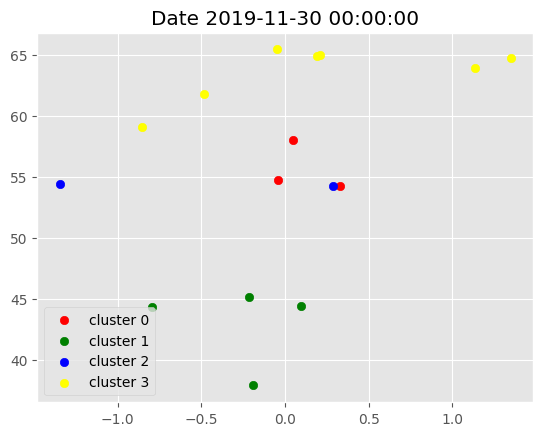

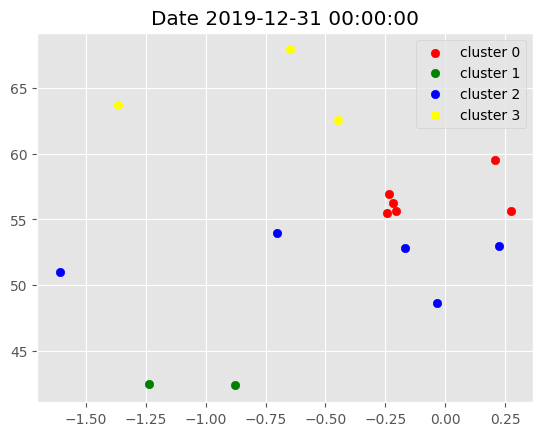

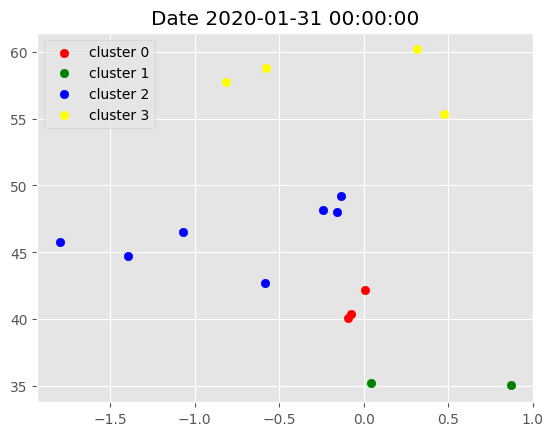

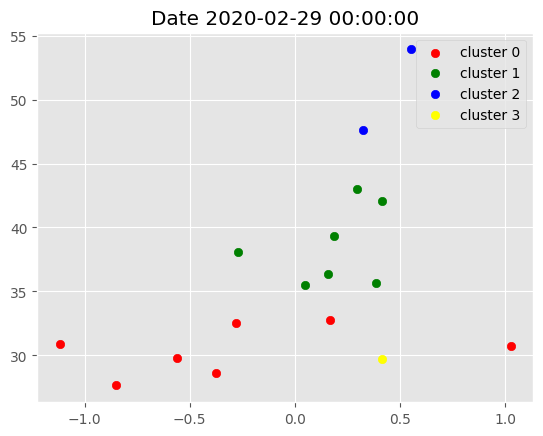

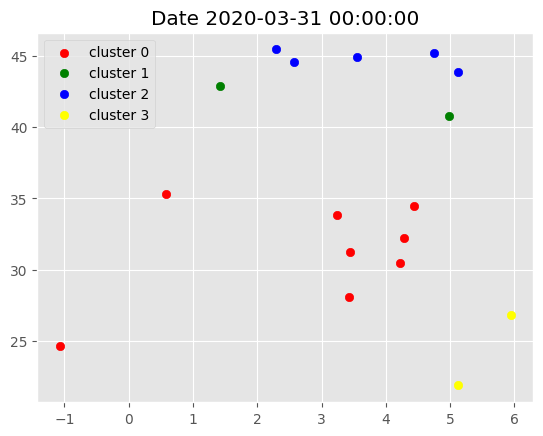

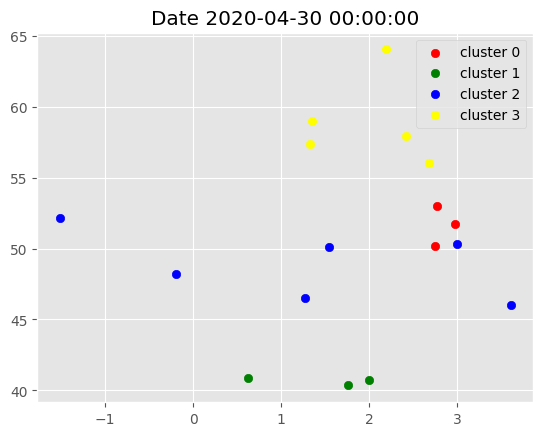

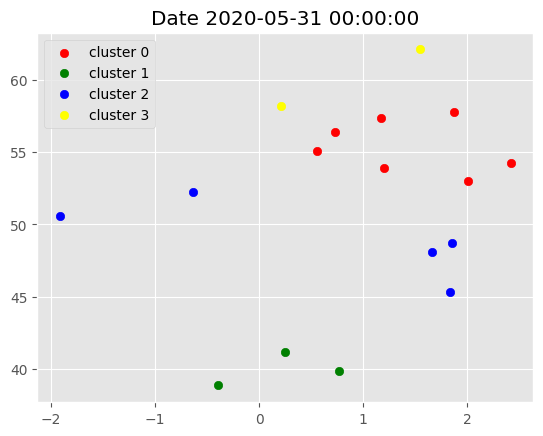

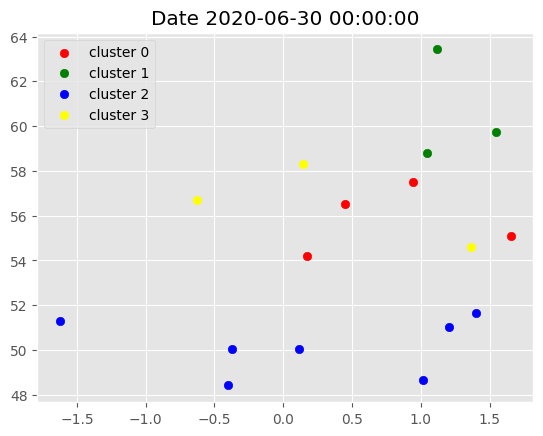

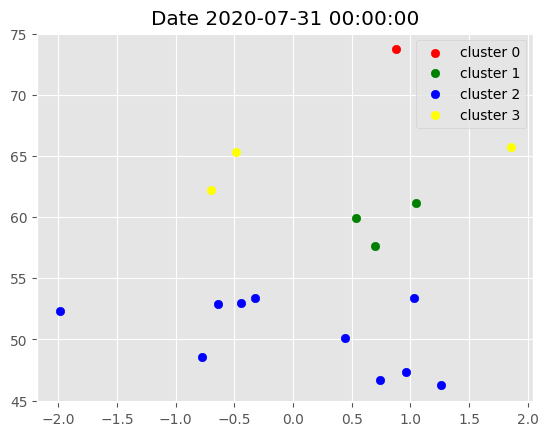

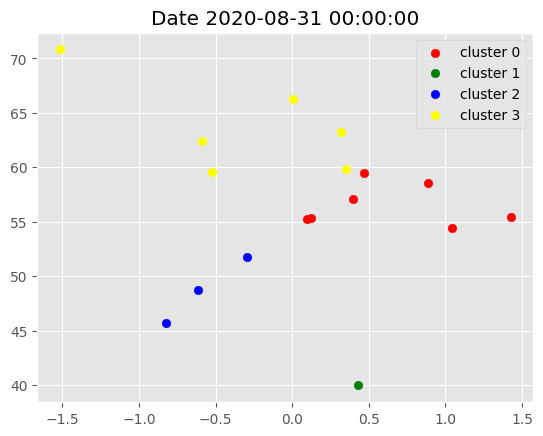

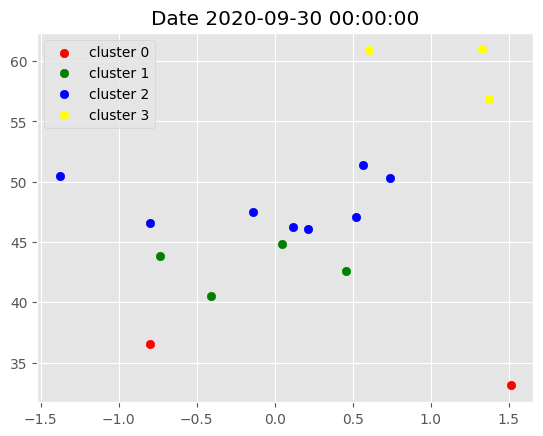

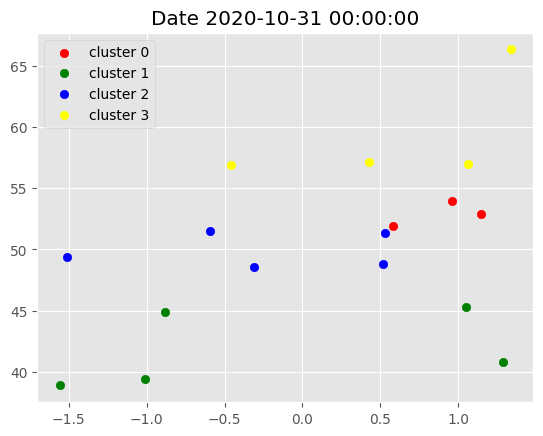

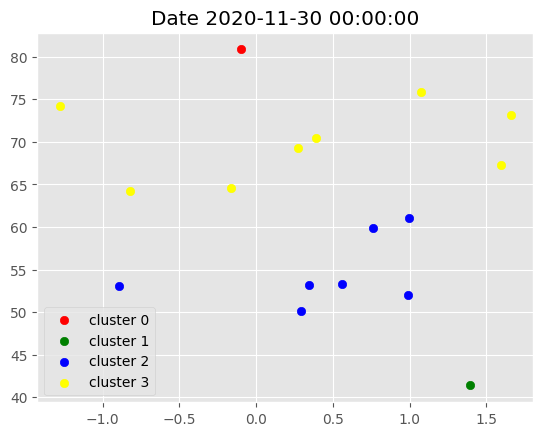

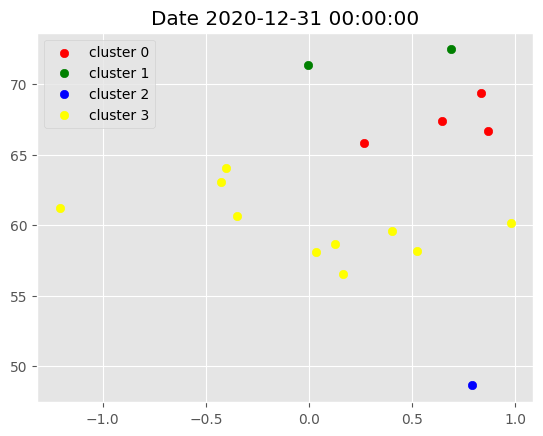

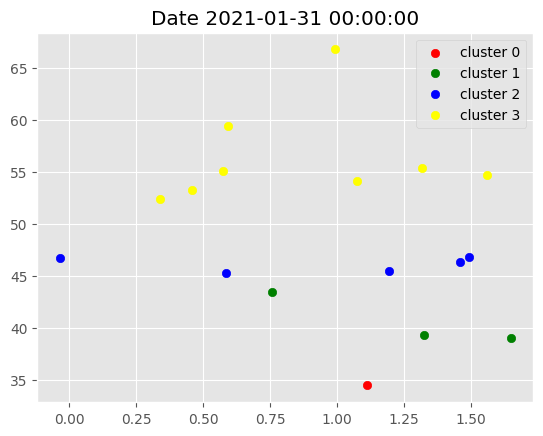

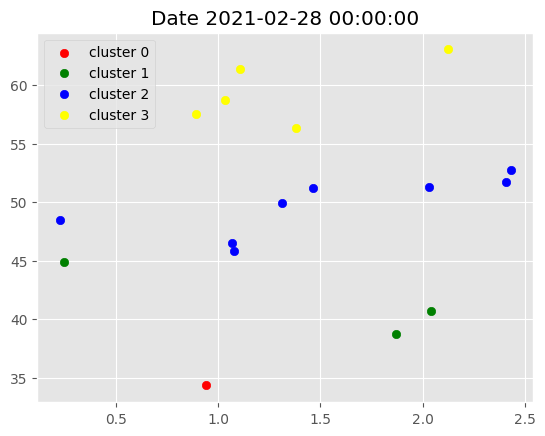

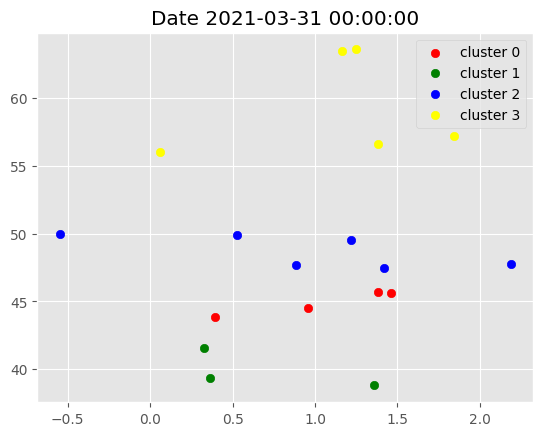

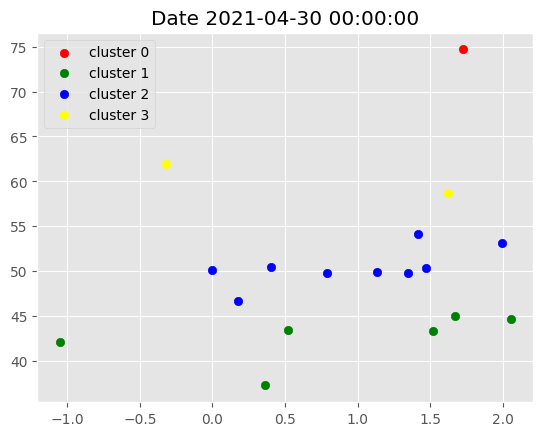

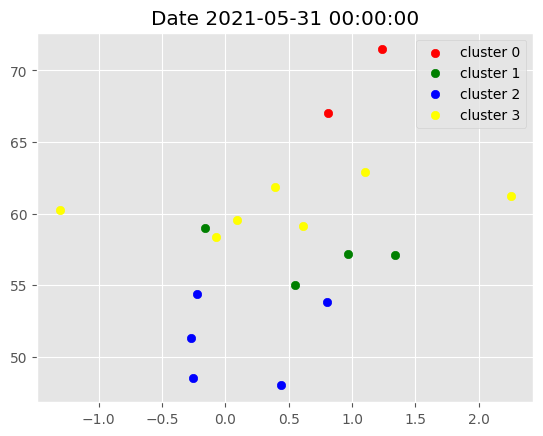

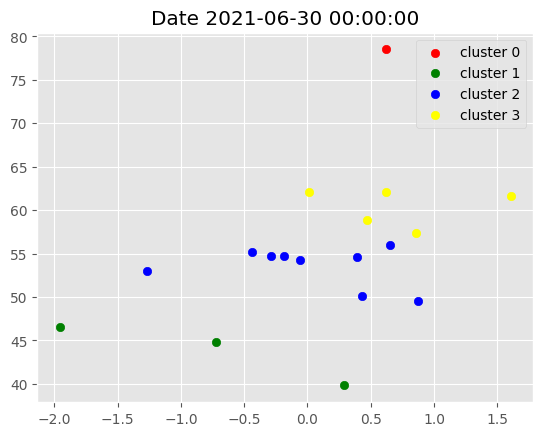

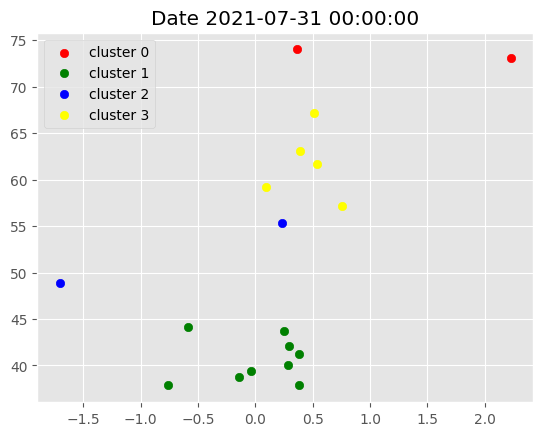

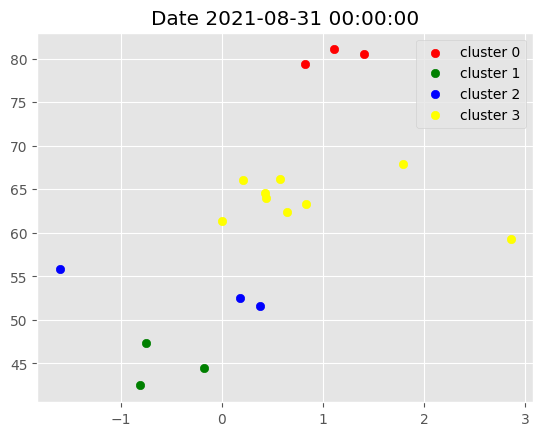

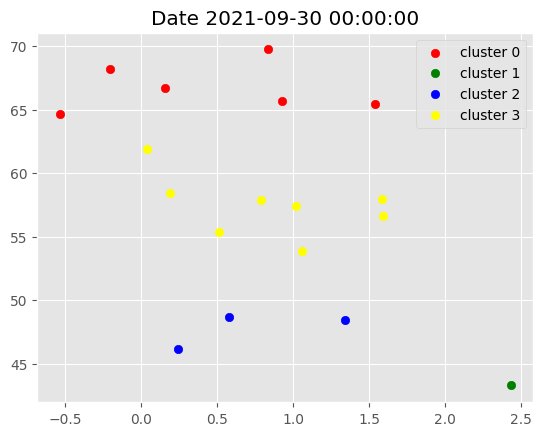

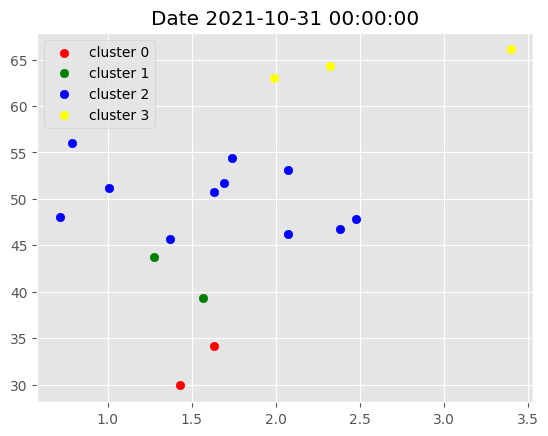

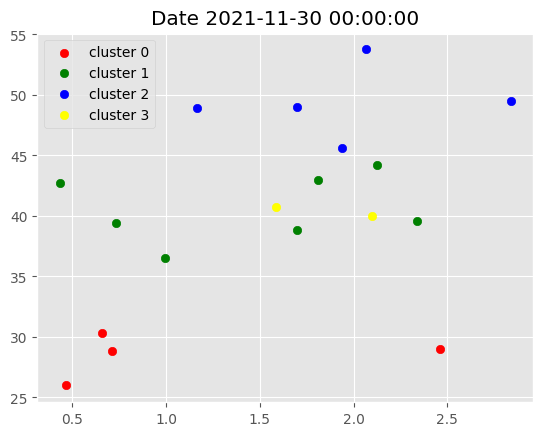

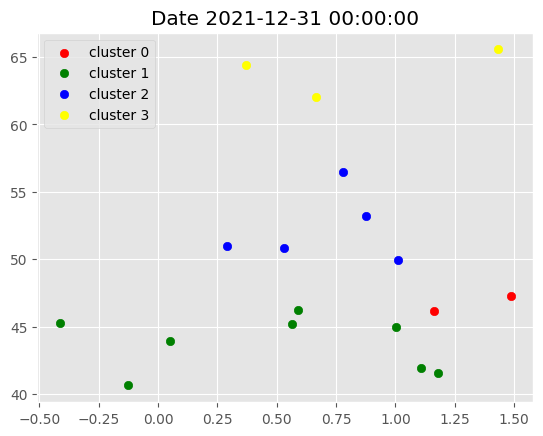

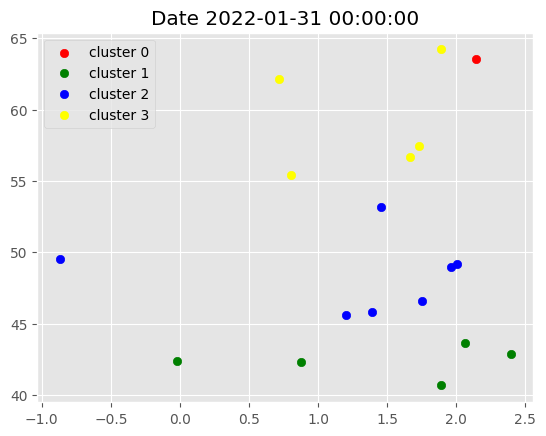

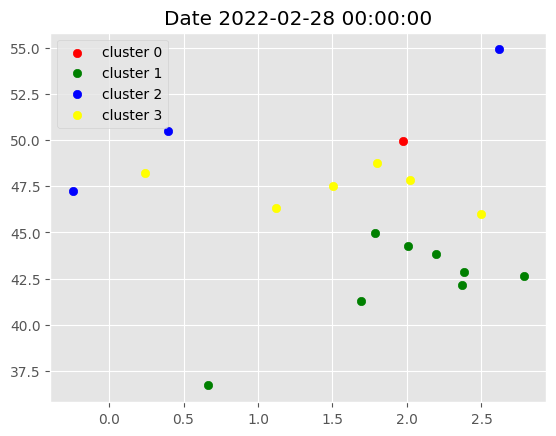

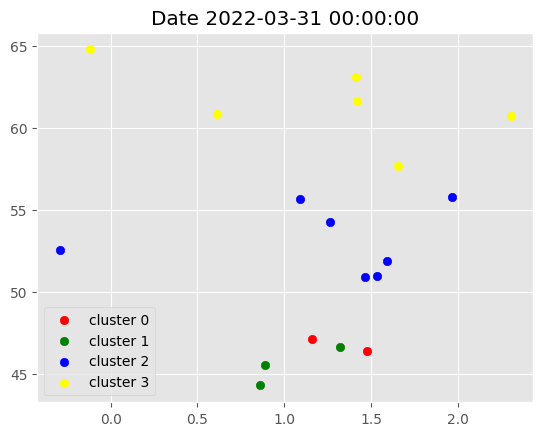

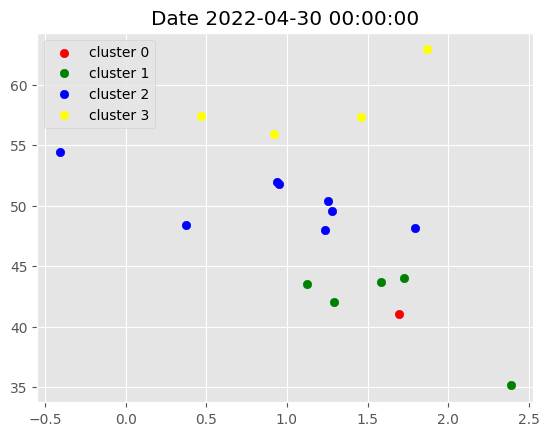

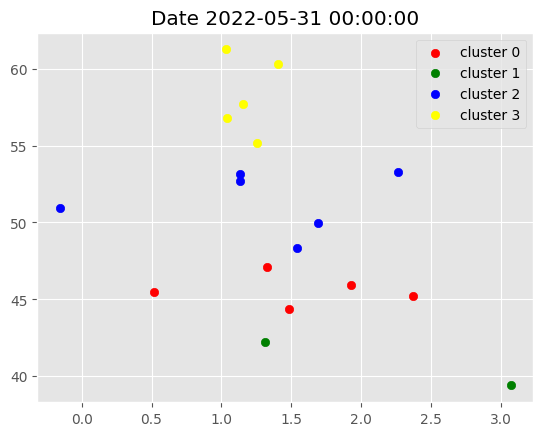

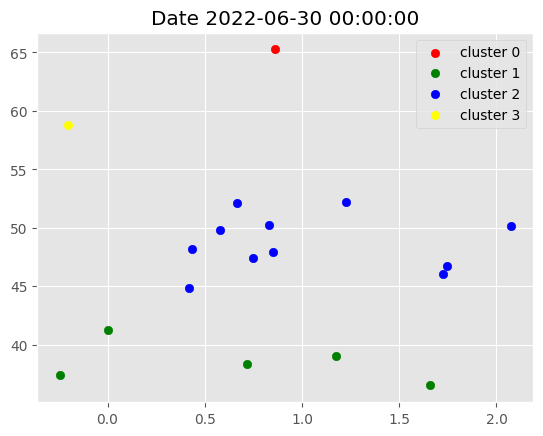

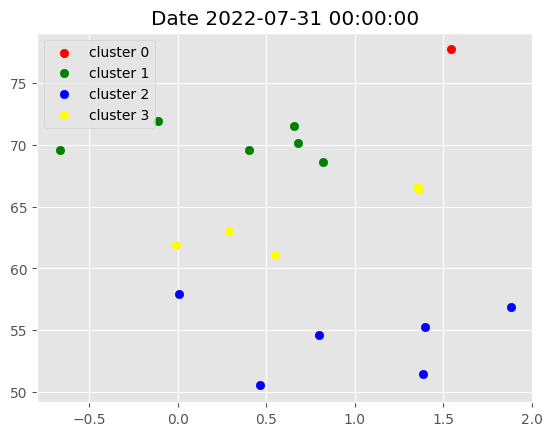

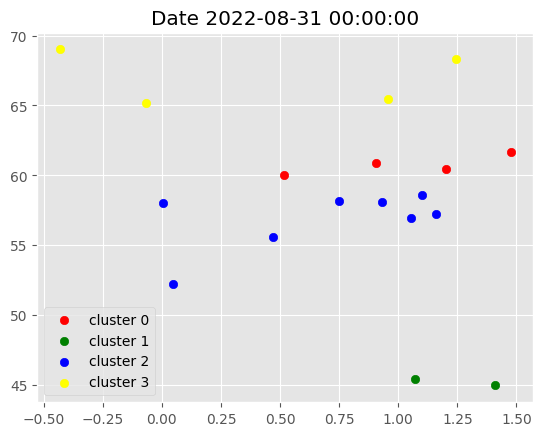

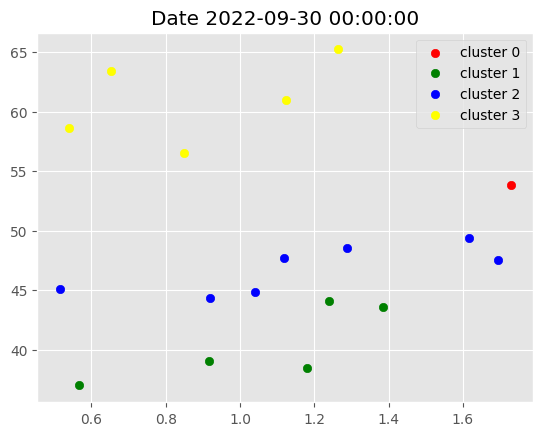

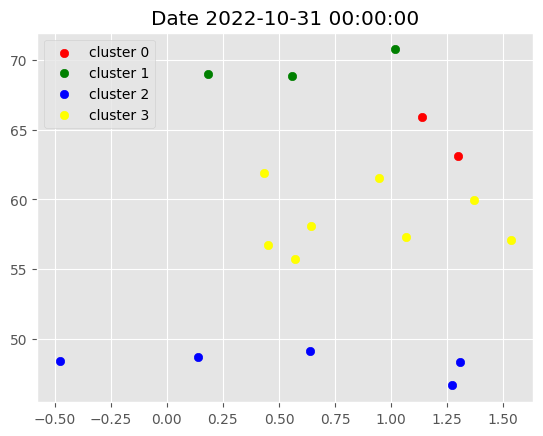

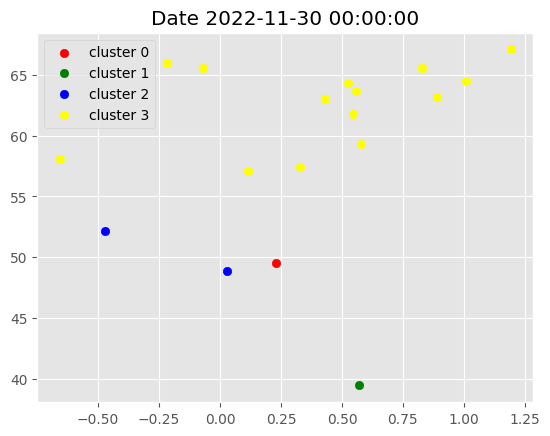

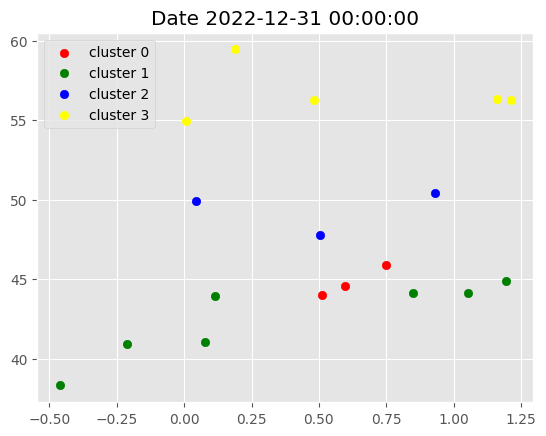

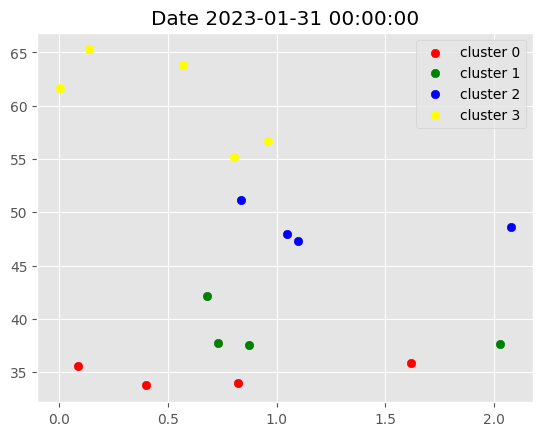

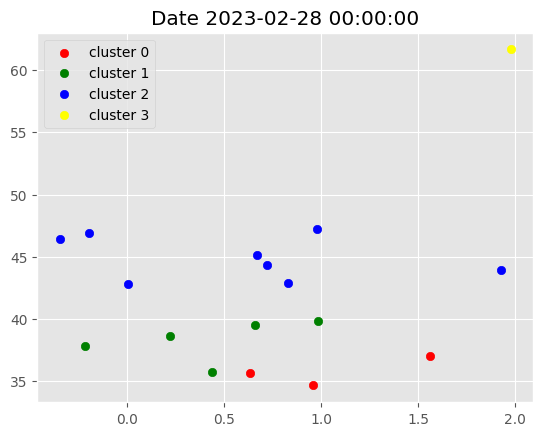

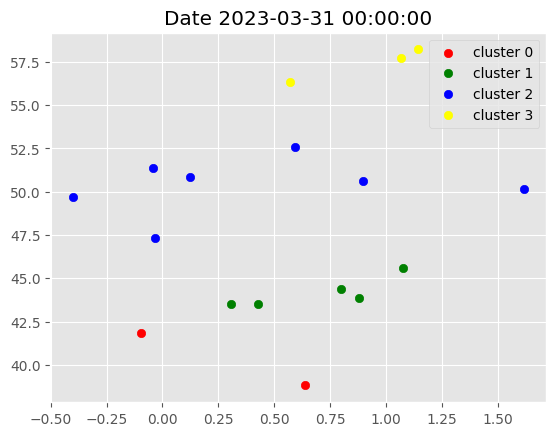

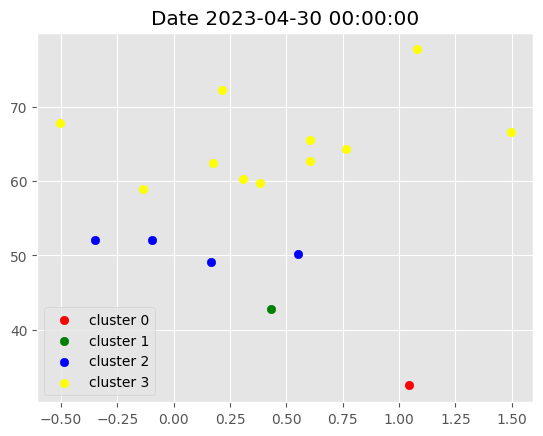

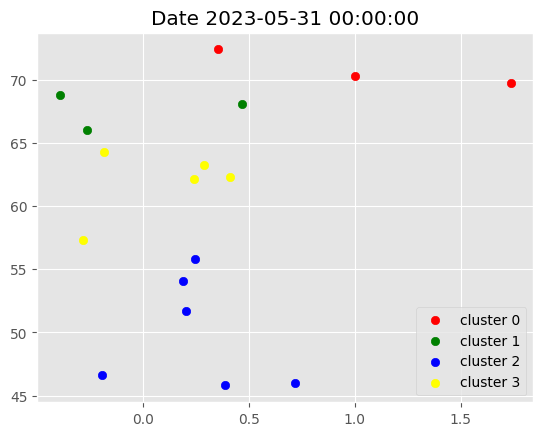

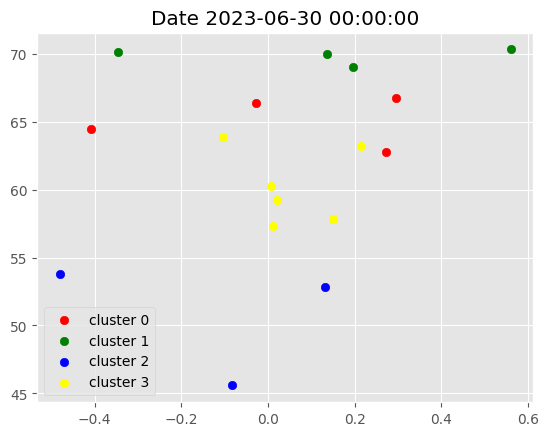

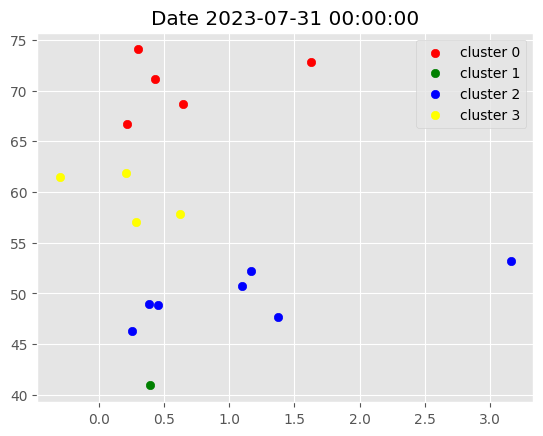

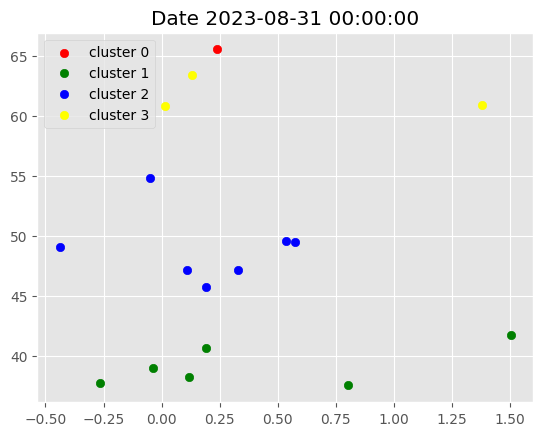

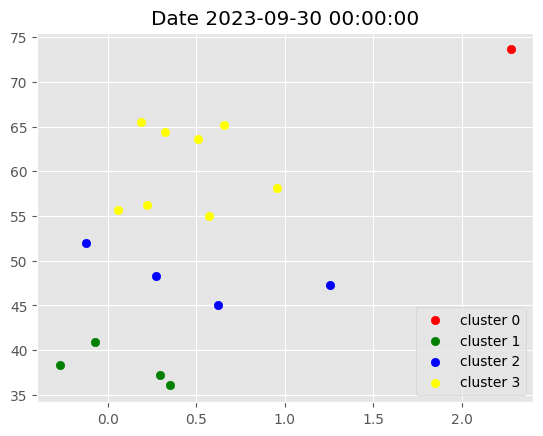

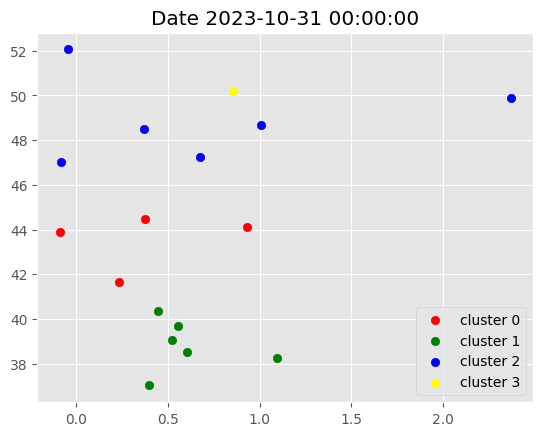

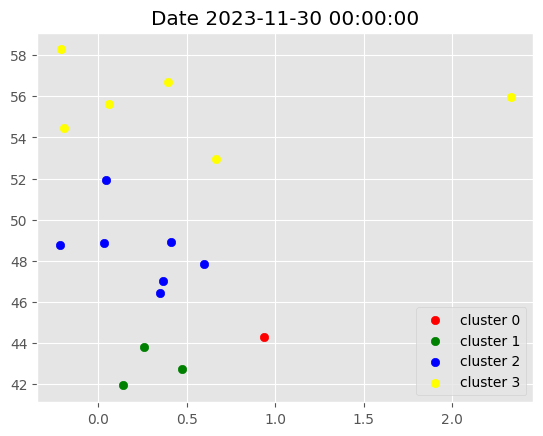

In [398]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

In [510]:
filtered_df = data[data['cluster']==3].copy()
filtered_df

atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2019-11-30 BHARTIARTL.NS  1.134526  6.140222  5.834730  5.987476   
           ICICIBANK.NS   0.191378  6.244067  6.125690  6.184878   
           INDUSINDBK.NS  1.348684  7.341280  7.140658  7.240969   
           RELIANCE.NS   -0.047086  7.357079  7.220935  7.289007   
           SBIN.NS        0.209774  5.814692  5.671148  5.742920   
...                            ...       ...       ...       ...   
2023-11-30 BHARTIARTL.NS  0.062189  6.874209  6.809309  6.841759   
           HINDUNILVR.NS -0.192672  7.850462  7.797359  7.823911   
           INDUSINDBK.NS -0.212638  7.307271  7.247039  7.277155   
           LT.NS          2.331770  8.051487  7.951086  8.001287   
           TATAMOTORS.NS  0.664478  6.515412  6.428131  6.471771   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2019-11-30 BHARTIARTL.NS          0.002884  1.951470  63.893726   0.182231   
           ICICIBANK.NS           0.009234  1.391412  64.891095   0.107008   
           INDUSINDBK.NS          0.006155  1.706138  64.767860   0.194868   
           RELIANCE.NS            0.013044  1.410779  65.436738   0.059275   
           SBIN.NS                0.025083  1.681150  64.950023   0.094270   
...                                    ...       ...        ...        ...   
2023-11-30 BHARTIARTL.NS          0.002108  0.130092  55.603066   0.024442   
           HINDUNILVR.NS         -0.003228 -0.230473  54.444455   0.021670   
           INDUSINDBK.NS          0.001344  0.312401  58.274066   0.033060   
           LT.NS                 -0.002716 -0.348528  55.959709   0.023011   
           TATAMOTORS.NS          0.003324  0.183996  52.925866   0.022111   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2019-11-30 BHARTIARTL.NS   0.097917   0.084580   0.040434   0.047247   
           ICICIBANK.NS    0.087163   0.077594   0.032674   0.043541   
           INDUSINDBK.NS   0.064947   0.039795  -0.002924   0.007573   
           RELIANCE.NS     0.079031   0.075019   0.026893   0.026643   
           SBIN.NS         0.123553   0.076732  -0.005100   0.026965   
...                             ...        ...        ...        ...   
2023-11-30 BHARTIARTL.NS   0.005571   0.030344   0.017125   0.026719   
           HINDUNILVR.NS   0.014541   0.004343  -0.006929   0.004345   
           INDUSINDBK.NS   0.020814   0.026111   0.026508   0.037826   
           LT.NS          -0.004492   0.034991   0.052789   0.040047   
           TATAMOTORS.NS   0.009751   0.022533   0.034358   0.048546   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2019-11-30 BHARTIARTL.NS    0.036474  0.253637 -0.592911  0.159885 -0.714707   
           ICICIBANK.NS     0.031262  0.878319 -0.486713  1.095112 -0.440787   
           INDUSINDBK.NS   -0.002822  1.192818  0.159345  1.292855 -1.500988   
           RELIANCE.NS      0.024428  0.368042 -0.635718  0.370533 -0.819073   
           SBIN.NS          0.015376  0.740185 -0.367092  1.525843 -0.809424   
...                              ...       ...       ...       ...       ...   
2023-11-30 BHARTIARTL.NS    0.008640  0.253637 -0.592911  0.159885 -0.714707   
           HINDUNILVR.NS   -0.003992  0.094794  0.030138  0.470139  0.166736   
           INDUSINDBK.NS    0.021380  1.192818  0.159345  1.292855 -1.500988   
           LT.NS            0.031296  0.742260  0.583016  0.262061  0.132189   
           TATAMOTORS.NS    0.032444  1.635736  0.112929  0.993429 -1.240921   

                               CMA  cluster  
date       ticker                            
2019-11-30 BHARTIARTL.NS -0.175518        3  
           ICIC

In [511]:
filtered_df = filtered_df.reset_index(level=1)
filtered_df


,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2019-11-30,BHARTIARTL.NS,1.134526,6.140222,5.834730,5.987476,0.002884,1.951470,63.893726,0.182231,0.097917,0.084580,0.040434,0.047247,0.036474,0.253637,-0.592911,0.159885,-0.714707,-0.175518,3
2019-11-30,ICICIBANK.NS,0.191378,6.244067,6.125690,6.184878,0.009234,1.391412,64.891095,0.107008,0.087163,0.077594,0.032674,0.043541,0.031262,0.878319,-0.486713,1.095112,-0.440787,-0.968767,3
2019-11-30,INDUSINDBK.NS,1.348684,7.341280,7.140658,7.240969,0.006155,1.706138,64.767860,0.194868,0.064947,0.039795,-0.002924,0.007573,-0.002822,1.192818,0.159345,1.292855,-1.500988,-1.111673,3
2019-11-30,RELIANCE.NS,-0.047086,7.357079,7.220935,7.289007,0.013044,1.410779,65.436738,0.059275,0.079031,0.075019,0.026893,0.026643,0.024428,0.368042,-0.635718,0.370533,-0.819073,-0.158497,3
2019-11-30,SBIN.NS,0.209774,5.814692,5.671148,5.742920,0.025083,1.681150,64.950023,0.094270,0.123553,0.076732,-0.005100,0.026965,0.015376,0.740185,-0.367092,1.525843,-0.809424,-0.958438,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,BHARTIARTL.NS,0.062189,6.874209,6.809309,6.841759,0.002108,0.130092,55.603066,0.024442,0.005571,0.030344,0.017125,0.026719,0.008640,0.253637,-0.592911,0.159885,-0.714707,-0.175518,3
2023-11-30,HINDUNILVR.NS,-0.192672,7.850462,7.797359,7.823911,-0.003228,-0.230473,54.444455,0.021670,0.014541,0.004343,-0.006929,0.004345,-0.003992,0.094794,0.030138,0.470139,0.166736,-1.041187,3
2023-11-30,INDUSINDBK.NS,-0.212638,7.307271,7.247039,7.277155,0.001344,0.312401,58.274066,0.033060,0.020814,0.026111,0.026508,0.037826,0.021380,1.192818,0.159345,1.292855,-1.500988,-1.111673,3


In [512]:
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df

,ticker,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2019-12-01,BHARTIARTL.NS,1.134526,6.140222,5.834730,5.987476,0.002884,1.951470,63.893726,0.182231,0.097917,0.084580,0.040434,0.047247,0.036474,0.253637,-0.592911,0.159885,-0.714707,-0.175518,3
2019-12-01,ICICIBANK.NS,0.191378,6.244067,6.125690,6.184878,0.009234,1.391412,64.891095,0.107008,0.087163,0.077594,0.032674,0.043541,0.031262,0.878319,-0.486713,1.095112,-0.440787,-0.968767,3
2019-12-01,INDUSINDBK.NS,1.348684,7.341280,7.140658,7.240969,0.006155,1.706138,64.767860,0.194868,0.064947,0.039795,-0.002924,0.007573,-0.002822,1.192818,0.159345,1.292855,-1.500988,-1.111673,3
2019-12-01,RELIANCE.NS,-0.047086,7.357079,7.220935,7.289007,0.013044,1.410779,65.436738,0.059275,0.079031,0.075019,0.026893,0.026643,0.024428,0.368042,-0.635718,0.370533,-0.819073,-0.158497,3
2019-12-01,SBIN.NS,0.209774,5.814692,5.671148,5.742920,0.025083,1.681150,64.950023,0.094270,0.123553,0.076732,-0.005100,0.026965,0.015376,0.740185,-0.367092,1.525843,-0.809424,-0.958438,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,BHARTIARTL.NS,0.062189,6.874209,6.809309,6.841759,0.002108,0.130092,55.603066,0.024442,0.005571,0.030344,0.017125,0.026719,0.008640,0.253637,-0.592911,0.159885,-0.714707,-0.175518,3
2023-12-01,HINDUNILVR.NS,-0.192672,7.850462,7.797359,7.823911,-0.003228,-0.230473,54.444455,0.021670,0.014541,0.004343,-0.006929,0.004345,-0.003992,0.094794,0.030138,0.470139,0.166736,-1.041187,3
2023-12-01,INDUSINDBK.NS,-0.212638,7.307271,7.247039,7.277155,0.001344,0.312401,58.274066,0.033060,0.020814,0.026111,0.026508,0.037826,0.021380,1.192818,0.159345,1.292855,-1.500988,-1.111673,3


In [513]:
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

In [514]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
dates


[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-

In [515]:
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level= 0).index.tolist()
fixed_dates

{'2019-12-01': ['BHARTIARTL.NS',
  'ICICIBANK.NS',
  'INDUSINDBK.NS',
  'RELIANCE.NS',
  'SBIN.NS',
  'SUNPHARMA.NS',
  'TATASTEEL.NS'],
 '2020-01-01': ['ICICIBANK.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS'],
 '2020-02-01': ['BHARTIARTL.NS', 'INFY.NS', 'KOTAKBANK.NS', 'LT.NS'],
 '2020-03-01': ['MARUTI.NS'],
 '2020-04-01': ['AXISBANK.NS', 'INDUSINDBK.NS'],
 '2020-05-01': ['BHARTIARTL.NS',
  'INFY.NS',
  'RELIANCE.NS',
  'SUNPHARMA.NS',
  'TCS.NS'],
 '2020-06-01': ['ITC.NS', 'SUNPHARMA.NS'],
 '2020-07-01': ['INFY.NS', 'ITC.NS', 'TATASTEEL.NS'],
 '2020-08-01': ['RELIANCE.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS'],
 '2020-09-01': ['AXISBANK.NS',
  'ICICIBANK.NS',
  'INDUSINDBK.NS',
  'SBIN.NS',
  'TATAMOTORS.NS',
  'TATASTEEL.NS'],
 '2020-10-01': ['INFY.NS', 'RELIANCE.NS', 'TCS.NS'],
 '2020-11-01': ['AXISBANK.NS', 'KOTAKBANK.NS', 'TATASTEEL.NS', 'TCS.NS'],
 '2020-12-01': ['BAJFINANCE.NS',
  'HDFCBANK.NS',
  'INDUSINDBK.NS',
  'ITC.NS',
  'KOTAKBANK.NS',
  'LT.NS',
  'SBIN.NS',
  'TATAMOTORS.NS'],
 '20

In [521]:
pip install --upgrade pypfopt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [526]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [528]:
def optimize_weights(prices, lower_bound= 0):
    
    returns = expected_returns.mean_historical_return(prices = prices, frequency =252)
    
    cov = risk_models.sample_cov(prices=prices,frequency =252)
    
    ef = EfficientFrontier (returns, cov, weight_bounds = (lower_bound,1), solver='SCS')
    
    weights = ef.max_sharpe()
    return ef.clean_weights

In [531]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks, start = data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  18 of 18 completed


Adj Close                                           \
            AXISBANK.NS BAJFINANCE.NS BHARTIARTL.NS  HDFCBANK.NS   
Date                                                               
2018-11-30   623.387756   2492.772949    284.262878  1026.901855   
2018-12-03   622.441406   2464.237305    289.930023  1019.592590   
2018-12-04   620.897217   2498.519775    288.841919  1006.204163   
2018-12-05   612.628601   2449.944824    283.628204  1012.789795   
2018-12-06   597.784851   2389.337158    275.648865  1011.752563   
...                 ...           ...           ...          ...   
2023-11-15  1041.349976   7224.299805    950.000000  1504.400024   
2023-11-16  1026.349976   7362.450195    949.549988  1508.349976   
2023-11-17   994.349976   7221.000000    947.299988  1505.099976   
2023-11-20   988.700012   7068.600098    961.400024  1505.199951   
2023-11-21   991.799988   7103.149902    970.849976  1517.949951   

                                                                              \
           HINDUNILVR.NS ICICIBANK.NS INDUSINDBK.NS      INFY.NS      ITC.NS   
Date                                                                           
2018-11-30   1614.211182   348.276123   1584.952515   582.136169  236.866989   
2018-12-03   1680.105103   348.619354   1608.749146   584.665344  234.504959   
2018-12-04   1663.585693   351.021912   1588.788940   597.660950  233.593262   
2018-12-05   1700.811646   344.598694   1557.561890   594.303101  228.206177   
2018-12-06   1657.925781   340.921295   1524.392334   583.051941  226.299957   
...                  ...          ...           ...          ...         ...   
2023-11-15   2486.399902   941.099976   1493.949951  1410.500000  441.950012   
2023-11-16   2491.199951   936.000000   1498.650024  1444.900024  438.649994   
2023-11-17   2528.800049   921.849976   1498.449951  1437.550049  439.250000   
2023-11-20   2506.449951   921.450012   1504.800049  1436.599976  436.799988   
2023-11-21   2505.250000   926.099976   1502.050049  1439.000000  436.250000   

                         ...    Volume                                  \
           KOTAKBANK.NS  ...    ITC.NS KOTAKBANK.NS    LT.NS MARUTI.NS   
Date                     ...                                             
2018-11-30  1230.917847  ...   8639876      3005495  2018571    869715   
2018-12-03  1223.087280  ...   8565591      1817913  1115862    772869   
2018-12-04  1222.289185  ...   6305882      1565130  1061729    551195   
2018-12-05  1208.523071  ...  11453283      2856527  1582751    704296   
2018-12-06  1177.349854  ...   9682118      3097300  1574405   1339030   
...                 ...  ...       ...          ...      ...       ...   
2023-11-15  1769.500000  ...   7436428      3432271  1160184    436538   
2023-11-16  1772.849976  ...  10857863      2079116  1597607    488715   
2023-11-17  1764.599976  ...   6655278      2710870  1325050    403772   
2023-11-20  1770.550049  ...   4335388      1923651  1231164    234246   
2023-11-21  1767.199951  ...   5994240      2705606  1884614    312230   

                                                                          \
           RELIANCE.NS   SBIN.NS SUNPHARMA.NS TATAMOTORS.NS TATASTEEL.NS   
Date                                                                       
2018-11-30    10819038  17583510      6544665      18393012     78540710   
2018-12-03     5622372  15772176     61492013      14068885    120923650   
2018-12-04     5242047  11897307     36233775      11481923     61538100   
2018-12-05     5874782  14893748     48891969      14960527     70780820   
2018-12-06     5921712  11083451     56087131      15428019    129667140   
...                ...       ...          ...           ...          ...   
2023-11-15     6110324  11397676      2246320      11324434     38344393   
2023-11-16     6567455   8622660      2205723      17501373     30836413   
2023-11-17     3879317  37173221       891965       9563220     233

In [536]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    end_date =(pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    cols = fixed_dates[start_date]
    optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    

In [538]:
optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
optimization_df

,AXISBANK.NS,BHARTIARTL.NS,HINDUNILVR.NS,INDUSINDBK.NS,LT.NS,TATAMOTORS.NS
Date,,,,,,
2022-12-01,902.928589,844.719788,2622.047119,1161.161499,2099.515381,436.888367
2022-12-02,904.227295,844.769592,2575.029053,1165.909302,2080.807617,434.047211
2022-12-05,898.283325,840.240356,2579.706055,1182.527100,2080.907471,427.417877
2022-12-06,903.727783,829.539551,2613.874512,1171.250732,2088.789551,425.773010
2022-12-07,913.717590,830.186584,2665.865479,1152.011841,2119.220947,418.794739
...,...,...,...,...,...,...
2023-11-15,1041.349976,950.000000,2486.399902,1493.949951,3064.949951,671.549988
2023-11-16,1026.349976,949.549988,2491.199951,1498.650024,3051.149902,680.400024
2023-11-17,994.349976,947.299988,2528.800049,1498.449951,3109.000000,681.549988


In [549]:
weights = optimize_weights(prices=optimization_df,lower_bound=round(1/(len(optimization_df.columns)*2),2))
weights

<bound method BaseOptimizer.clean_weights of <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x000001D20A495CA0>>